<h1> <center> Stock Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\3M\Desktop\New folder\data project.csv")
df

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971


<H3> DATA AUDIT

In [14]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,2023-07-17,193.99,50520160,191.90,194.3200,191.81
1,AAPL,2023-07-14,190.69,41616240,190.23,191.1799,189.63
2,AAPL,2023-07-13,190.54,41342340,190.50,191.1900,189.78
3,AAPL,NaT,189.77,60750250,189.68,191.7000,188.47
4,AAPL,NaT,188.08,46638120,189.16,189.3000,186.60


In [3]:
df.tail()

,Company,Date,Close/Last,Volume,Open,High,Low
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971
25159,NFLX,07/18/2013,$38.0586,20418642,$38.6157,$38.6157,$37.7143


In [4]:
df.sample(10)

,Company,Date,Close/Last,Volume,Open,High,Low
23165,NFLX,06/18/2021,$500.77,5197576,$496.40,$504.49,$495.24
18794,TSLA,10/31/2018,$22.488,114012543,$22.1693,$22.80,$21.94
1772,AAPL,06/29/2016,$23.60,146021680,$23.4925,$23.6375,$23.4075
9050,CSCO,07/26/2017,$31.66,21628960,$32.12,$32.225,$31.51
1012,AAPL,07-09-2019,$50.31,82312080,$49.80,$50.3775,$49.7025
22329,AMD,10/15/2014,$2.61,36155290,$2.62,$2.705,$2.54
15183,AMZN,03-10-2023,$90.73,69827490,$92.67,$93.57,$90.245
1209,AAPL,09/24/2018,$55.1975,110325080,$54.205,$55.315,$54.1575
16415,AMZN,04/18/2018,$76.392,101833540,$75.7325,$76.69,$75.2055
14533,META,10-09-2015,$93.24,19979290,$92.90,$93.74,$92.239


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [6]:
df.dtypes

Company       object
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [7]:
df.isna().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [8]:
# Remove the dollar signs and convert the columns to numeric types
columns_to_convert = ['Close/Last', 'Open', 'High', 'Low']

for column in columns_to_convert:
   df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     25160 non-null  object 
 1   Date        25160 non-null  object 
 2   Close/Last  25160 non-null  float64
 3   Volume      25160 non-null  int64  
 4   Open        25160 non-null  float64
 5   High        25160 non-null  float64
 6   Low         25160 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [11]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

C:\Users\3M\AppData\Local\Temp\ipykernel_25036\993103273.py:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


<H3> Overview of Descriptive Statistics

In [10]:
df.describe().round()

,Close/Last,Volume,Open,High,Low
count,25160.0,2.516000e+04,25160.0,25160.0,25160.0
mean,102.0,5.131764e+07,102.0,104.0,101.0
std,102.0,6.399143e+07,102.0,104.0,100.0
min,2.0,1.143952e+06,2.0,2.0,2.0
25%,37.0,1.200394e+07,37.0,37.0,36.0
50%,66.0,2.672083e+07,66.0,66.0,65.0
75%,134.0,6.857269e+07,134.0,136.0,133.0
max,692.0,1.065209e+09,692.0,701.0,686.0


<h3> EXPLORATORY DATA ANALYSIS

- <h4> Distribution Of Closing Prices

c:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


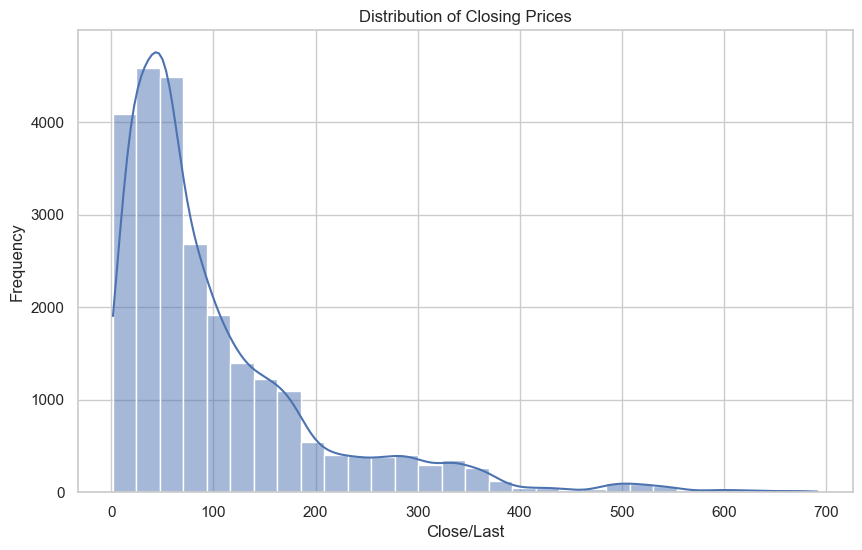

In [63]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Close/Last'], kde=True, bins=30)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close/Last')
plt.ylabel('Frequency')
plt.show()

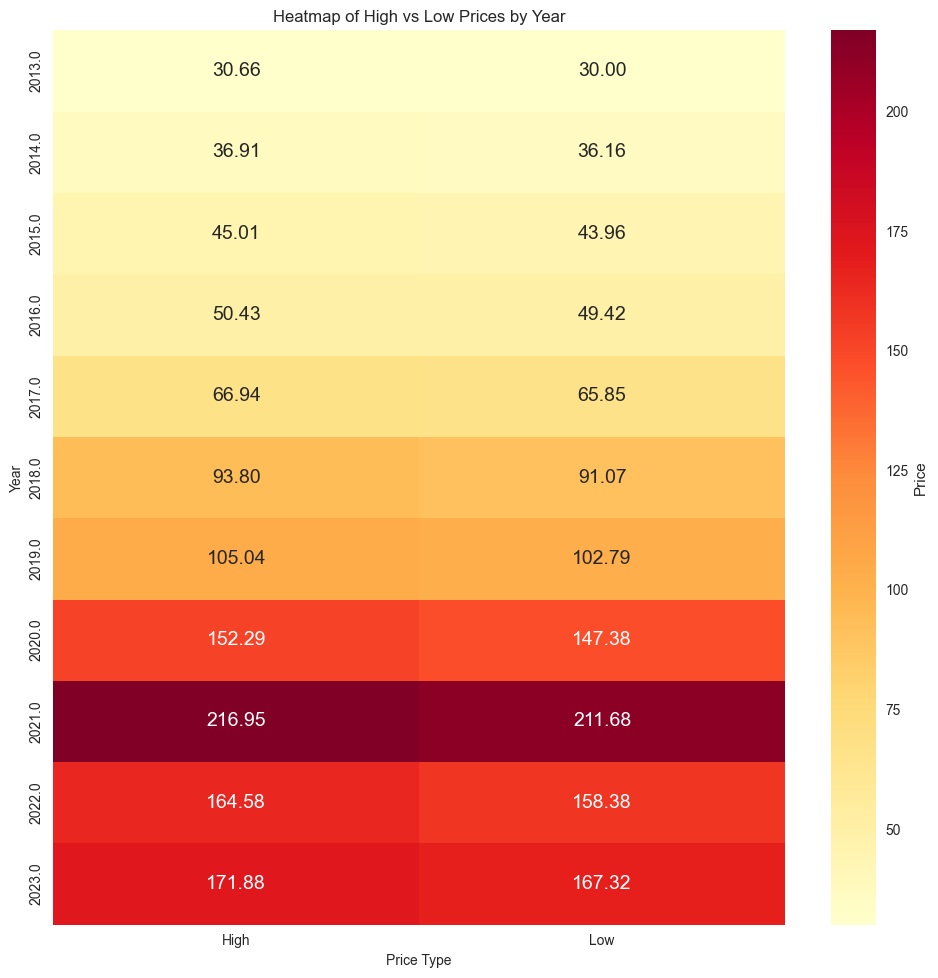

In [41]:
 df_pivot = df.pivot_table(values=['High', 'Low'], 
                         index=df['Date'].dt.year,  
                         aggfunc='mean')  

plt.style.use('seaborn-v0_8-dark')

plt.figure(figsize=(10, 10))

sns.heatmap(df_pivot, 
            annot=True,  # Show values in cells
            fmt='.2f',   # Format to 2 decimal places
            cmap='YlOrRd',  # Color scheme
            cbar_kws={'label': 'Price'})


plt.title('Heatmap of High vs Low Prices by Year', fontsize=12)
plt.xlabel('Price Type', fontsize=10)
plt.ylabel('Year', fontsize=10)


plt.tight_layout()


plt.show()


- <h4> Relationship Between Opening and Closing Prices

c:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


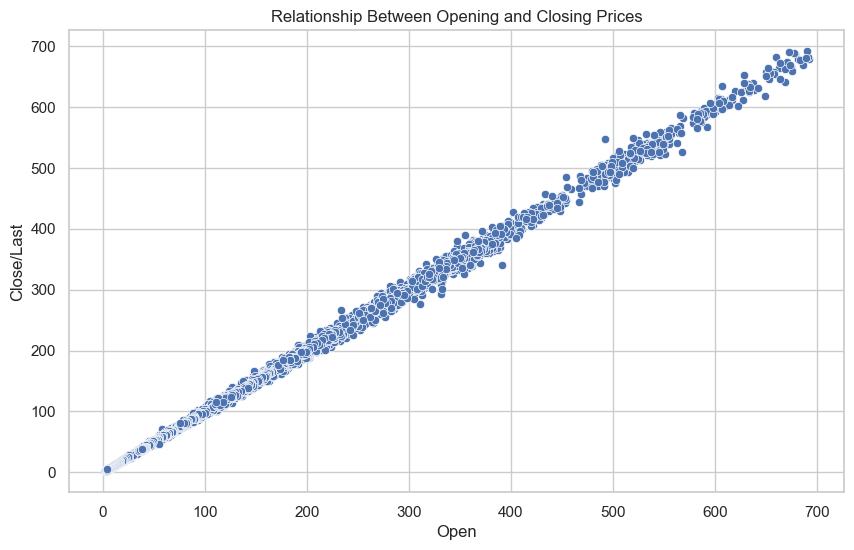

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close/Last', data=df)
plt.title('Relationship Between Opening and Closing Prices')
plt.xlabel('Open')
plt.ylabel('Close/Last')
plt.show()

- <h4>  Trading Volume Over Time

c:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

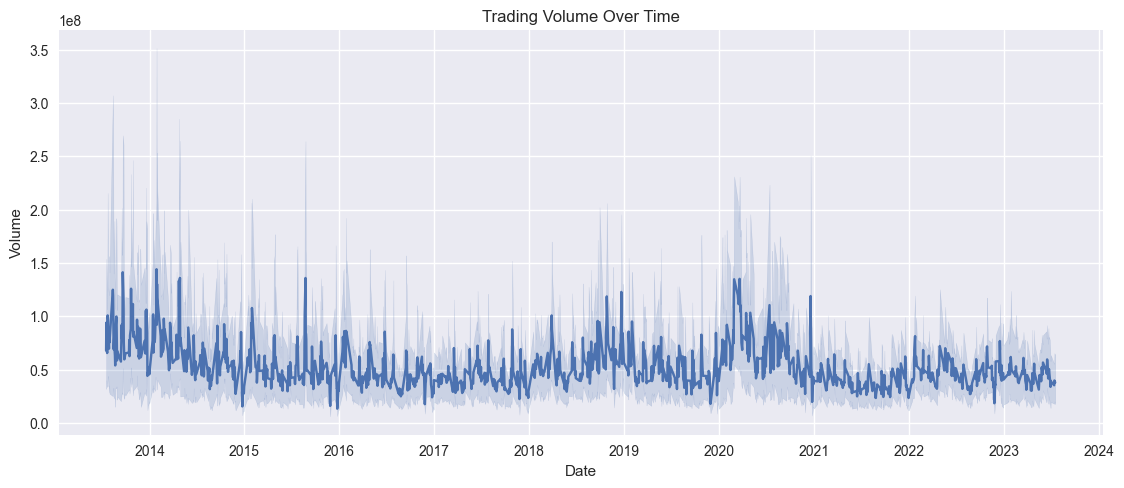

In [30]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='Volume', data=df)
plt.title('Trading Volume Over Time')
#plt.style.use('dark_background')
plt.show()

- <h4> Total Trading Volume by Company

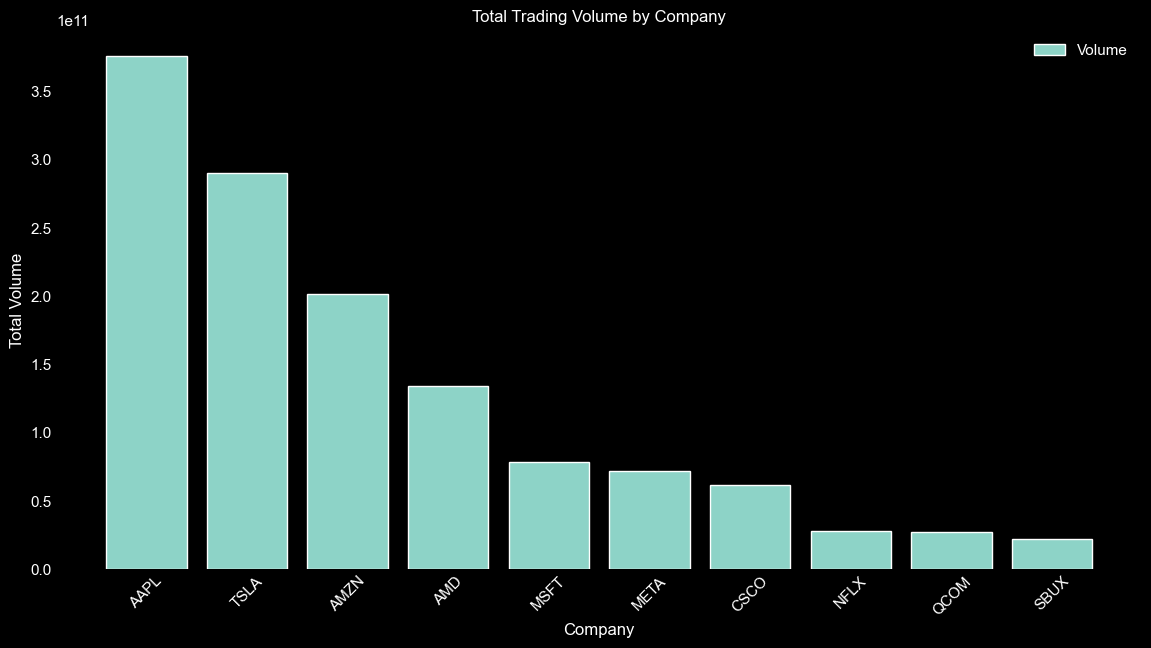

In [57]:
dp = df.groupby('Company')['Volume'].sum().reset_index()
dp = dp.sort_values(by='Volume', ascending=False)
plt.figure(figsize=(14, 7))
plt.bar(dp['Company'], dp['Volume'])
plt.title('Total Trading Volume by Company')
plt.xlabel('Company')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.style.use('dark_background')
plt.legend(['Volume'])
plt.show()

C:\Users\3M\AppData\Local\Temp\ipykernel_25036\3906435892.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # Clean, modern look
c:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\3M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\3M\AppData\Local\Programs\Python\Pyt

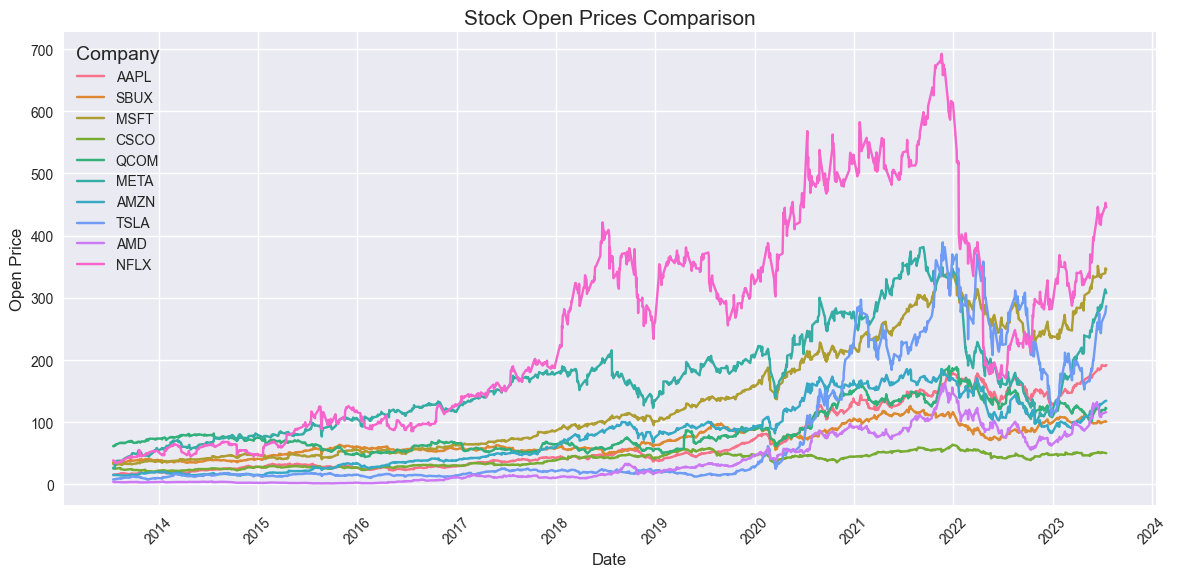

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df, 
    x='Date', 
    y='Open', 
    hue='Company',
    #marker='o'
)

plt.title('Stock Open Prices Comparison', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Open Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()